<a href="https://colab.research.google.com/github/MohammadAburub93/Python-Data-Science-Practice/blob/main/Seaborn%20and%20Linear%20Regression/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [125]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [126]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [127]:
print(f'the dataset has {data.shape[0]} rows and {data.shape[1]} coloumns.')
print(data.isna().values.any())
print(data.duplicated().values.any())
print(data.duplicated().sum().sum())
print(data.info())
print(data.head())
print(data.tail())

the dataset has 5391 rows and 6 coloumns.
False
False
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None
   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse         

### Data Type Conversions

In [128]:
col_names = ['USD_Domestic_Gross', 'USD_Production_Budget', 'USD_Worldwide_Gross']
for col in col_names:
  data[col] = data[col].astype(str).replace(r'[\$,]', '', regex=True)
  data[col] = pd.to_numeric(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [129]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

In [131]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [132]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


# Investigating the Zero Revenue Films

In [133]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that has zero domestic gross are {len(zero_domestic)}')

Number of films that has zero domestic gross are 512


In [134]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [135]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that has zero worldwild gross are {len(zero_worldwide)}')

Number of films that has zero worldwild gross are 357


In [136]:
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [137]:
International_releases = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
len(International_releases)

155

In [138]:
International_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [139]:
q_international_releases = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
q_international_releases.shape
q_international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films



In [140]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [141]:
not_released = data[data.Release_Date > scrape_date]
not_released.shape

(7, 6)

In [142]:
q_not_released = data.query('Release_Date > @scrape_date')
q_not_released.shape

(7, 6)

In [143]:
len(not_released)

7

In [144]:
data_clean = data.drop(not_released.index)
data_clean.shape

(5384, 6)

### Films that Lost Money



In [145]:
failed_films = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
failed_films.shape
print(f"the real percentage of films did not break in box office are {(len(failed_films)/len(data_clean)) * 100}%")

the real percentage of films did not break in box office are 37.27711738484398%


# Seaborn for Data Viz: Bubble Charts

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

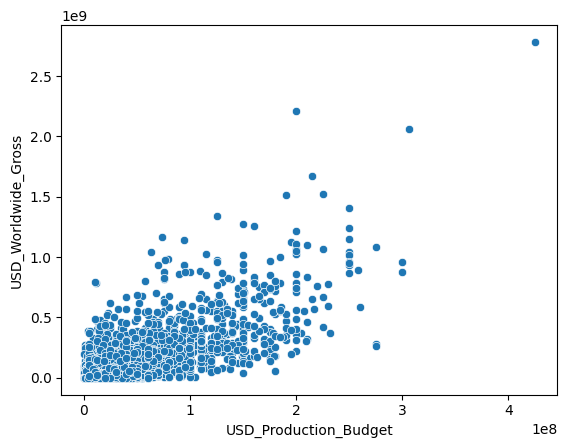

In [146]:
sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

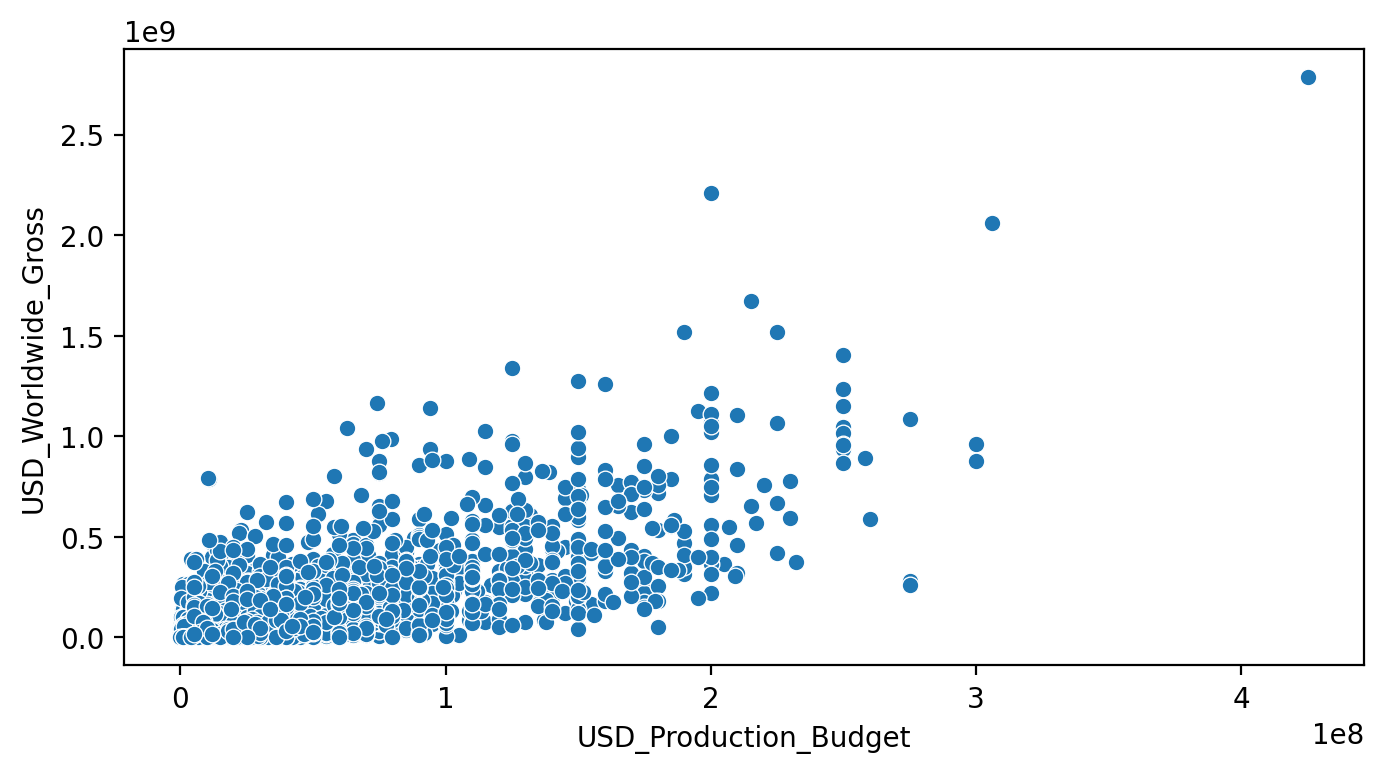

In [147]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')
plt.show()

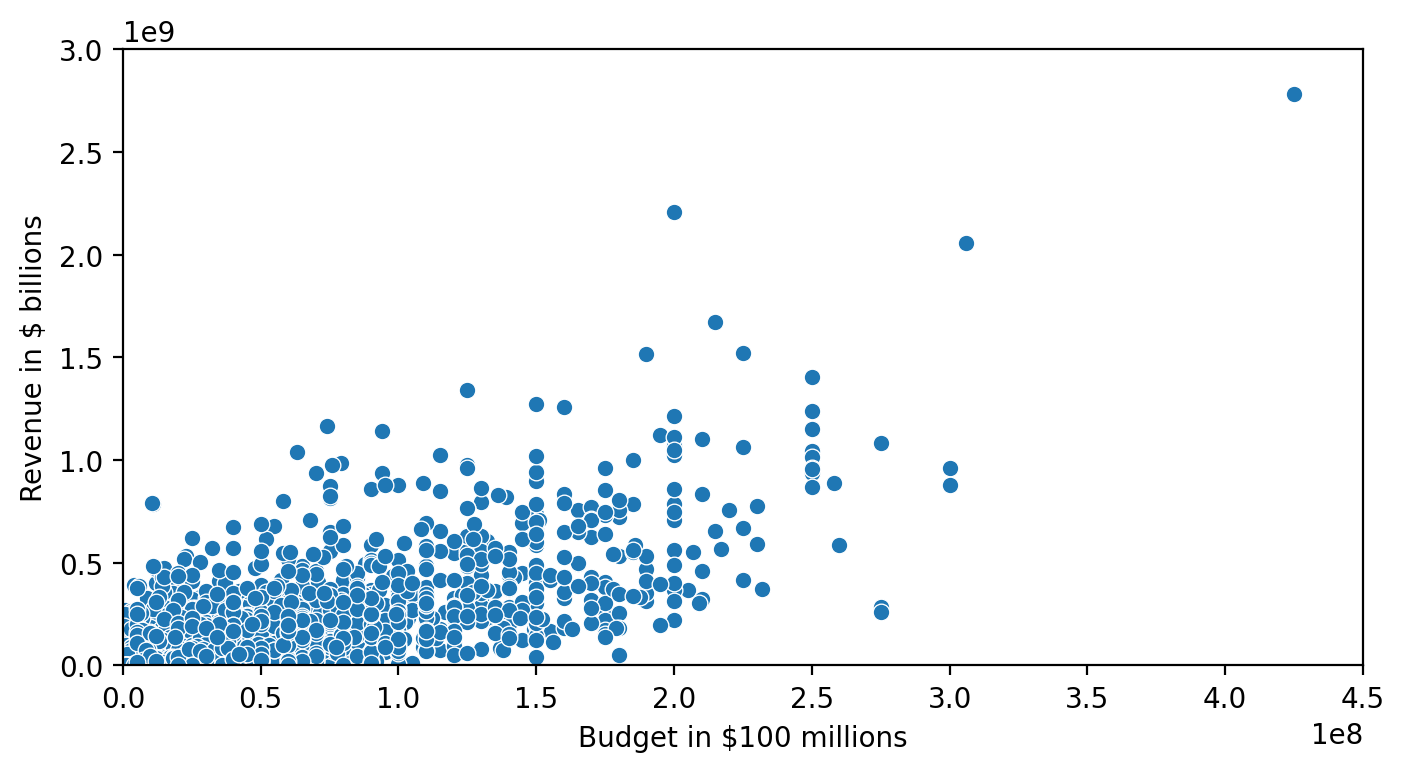

In [148]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0,3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')
plt.show()

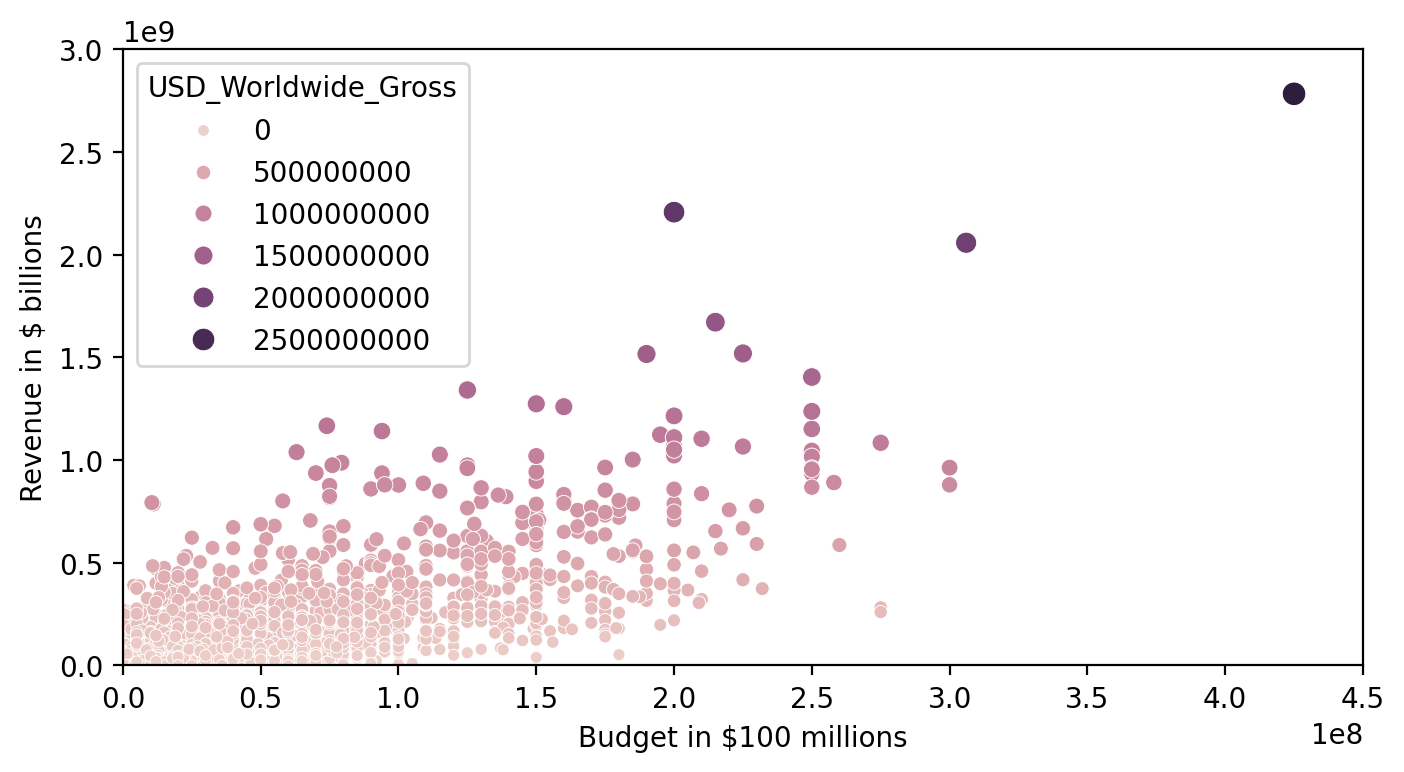

In [149]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0,3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')
plt.show()

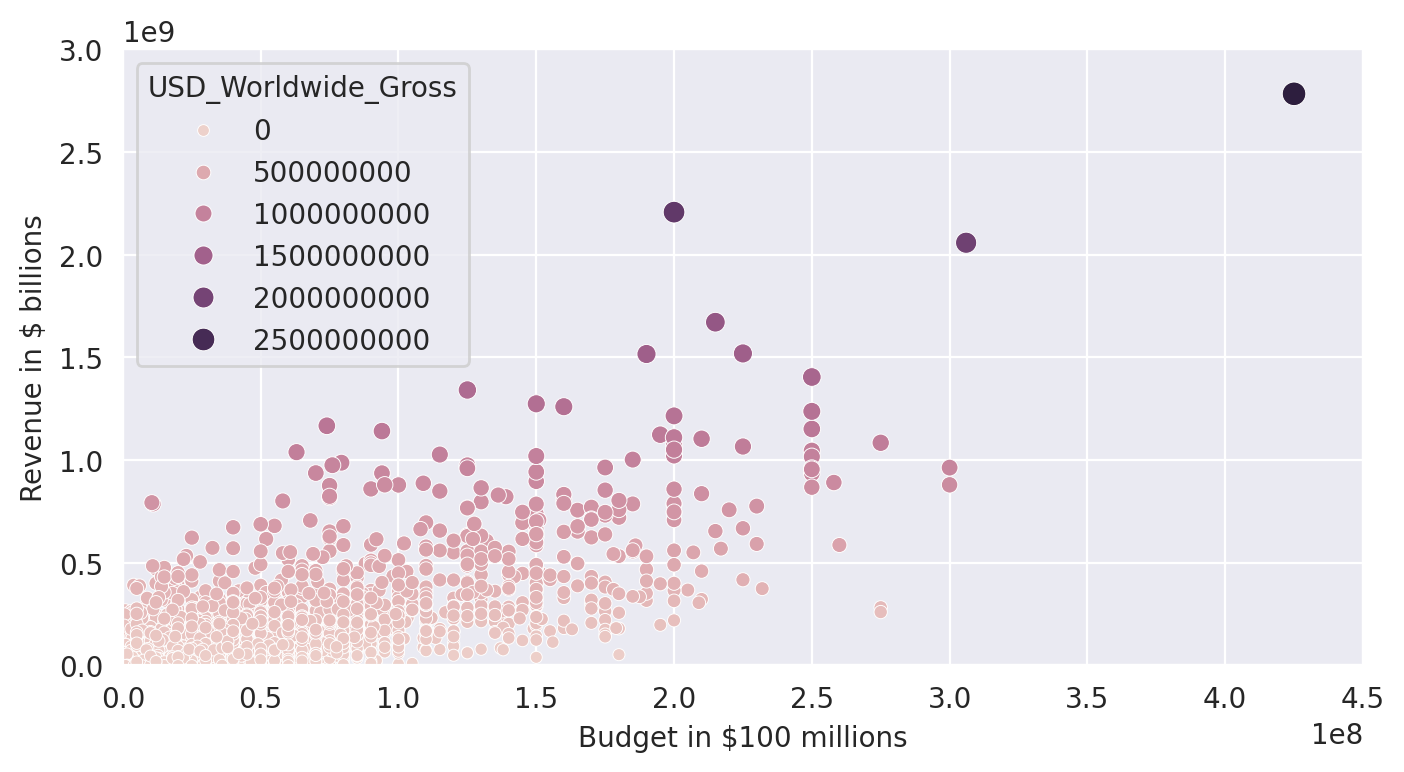

In [150]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross',
                     size='USD_Worldwide_Gross')

ax.set(ylim=(0,3000000000),
       xlim=(0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time


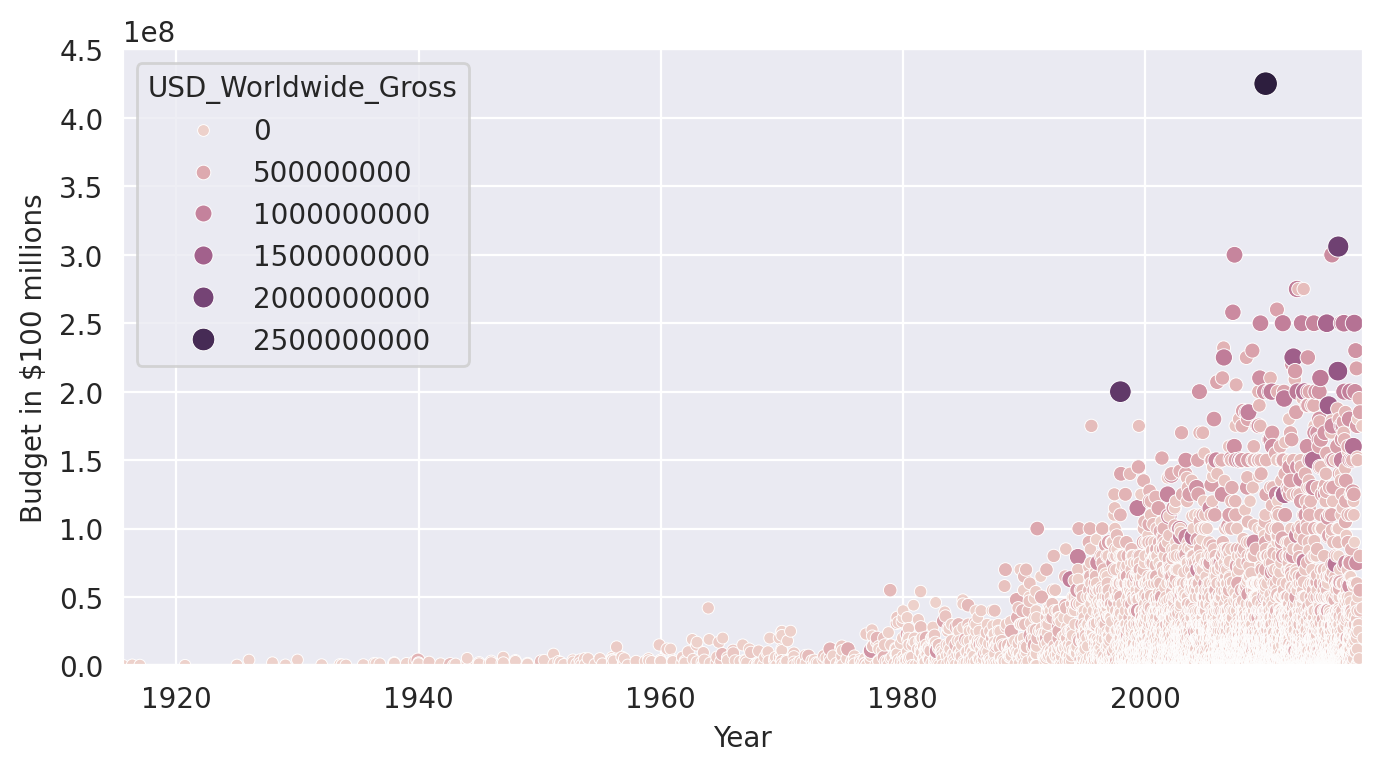

In [151]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax2 = sns.scatterplot(data_clean,
                        x='Release_Date',
                        y='USD_Production_Budget',
                        hue='USD_Worldwide_Gross',
                        size='USD_Worldwide_Gross')

ax2.set(
    ylim=(0,450000000),
    xlim=(data_clean.Release_Date.min(),data_clean.Release_Date.max()),
    ylabel='Budget in $100 millions',
    xlabel='Year'
)
plt.show()

In [152]:
release_years = pd.DatetimeIndex(data_clean.Release_Date).year

In [153]:
decade_column = release_years // 10 * 10

In [154]:
data_clean['Decade'] = decade_column

In [155]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films


In [156]:
old_films = data_clean[data_clean.Decade < 1970]

In [157]:
new_films = data_clean[data_clean.Decade >= 1970]

In [158]:
len(old_films)

153

In [159]:
old_films.loc[old_films.USD_Production_Budget.idxmax()]

,109
Rank,1253
Release_Date,1963-12-06 00:00:00
Movie_Title,Cleopatra
USD_Production_Budget,42000000
USD_Worldwide_Gross,71000000
USD_Domestic_Gross,57000000
Decade,1960


In [160]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

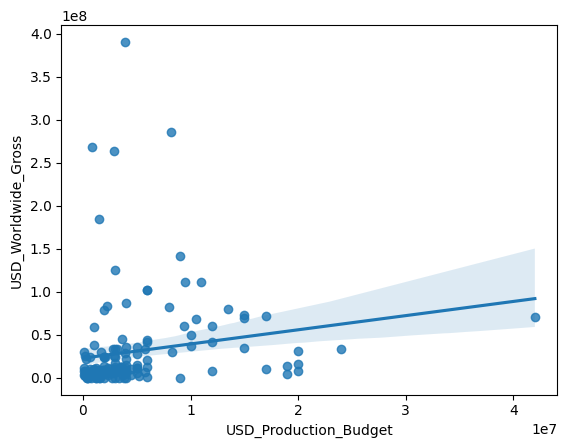

In [161]:
sns.regplot(data=old_films, x= 'USD_Production_Budget', y= 'USD_Worldwide_Gross')

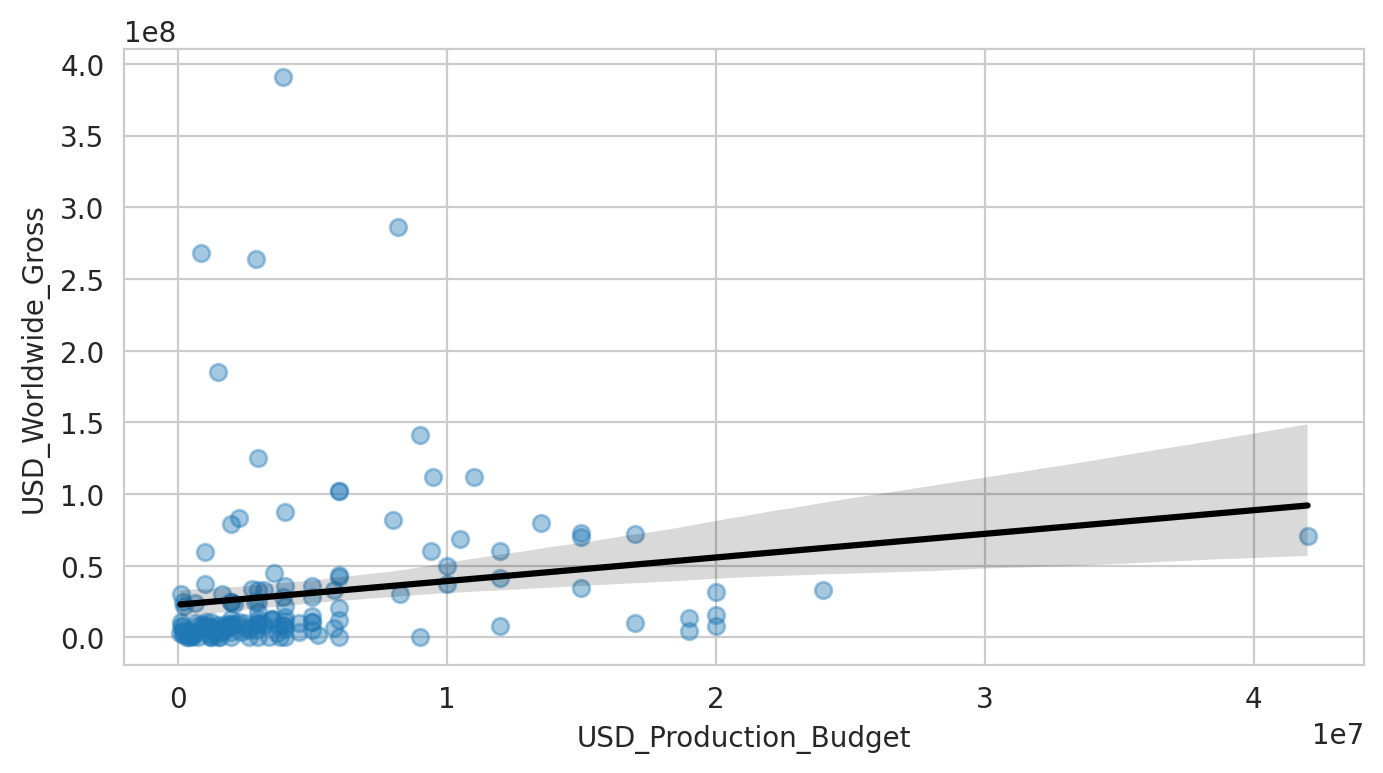

In [162]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=old_films,
              x= 'USD_Production_Budget',
              y= 'USD_Worldwide_Gross',
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'}
              )

<function matplotlib.pyplot.show(close=None, block=None)>

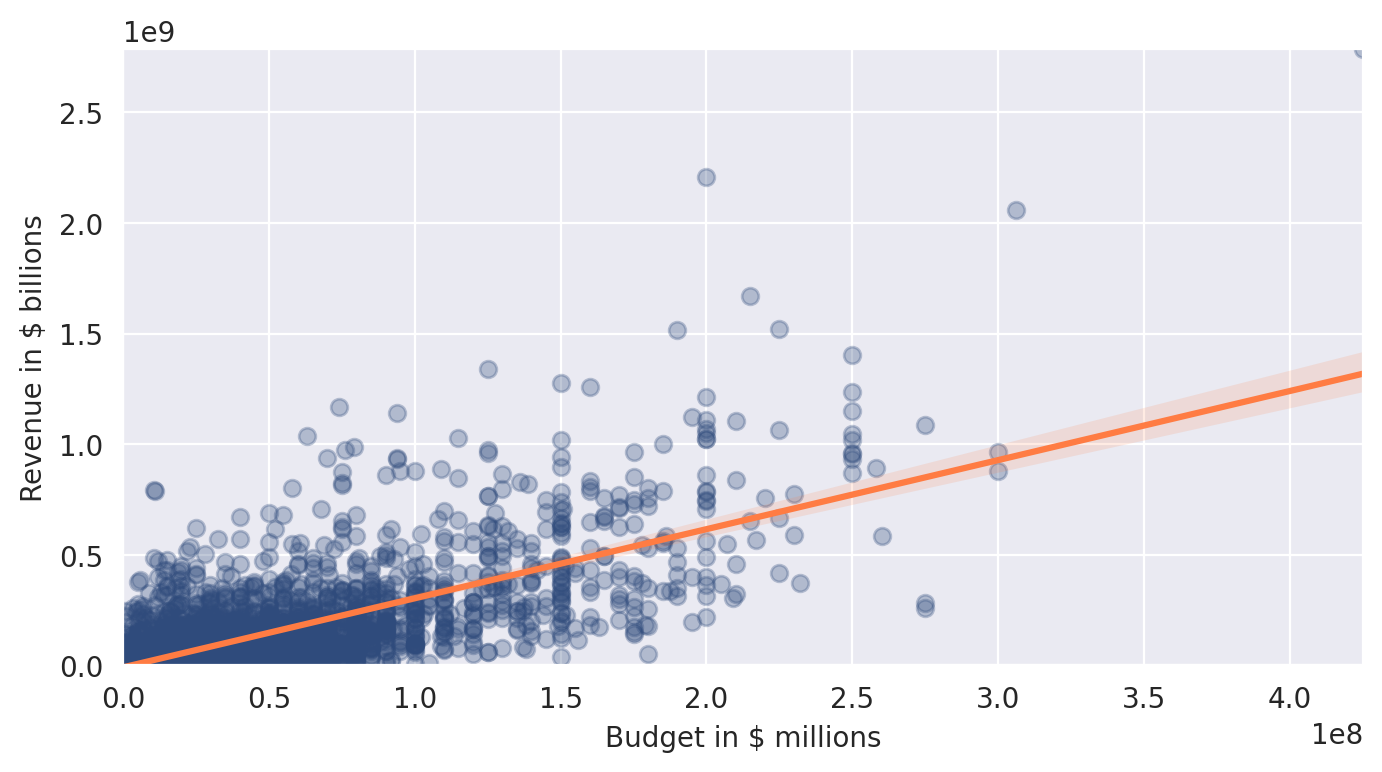

In [163]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  reg_ax = sns.regplot(data=new_films,
            x= 'USD_Production_Budget',
            y= 'USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws={'alpha': 0.3},
            line_kws={'color': '#ff7c43'}
            )
reg_ax.set(
    xlim=(0, new_films.USD_Production_Budget.max()),
    ylim=(0, new_films.USD_Worldwide_Gross.max()),
    xlabel='Budget in $ millions',
    ylabel='Revenue in $ billions'
)
plt.show

In [164]:
regression =LinearRegression()

In [165]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

In [166]:
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [167]:
regression.fit(X,y)

LinearRegression()

In [168]:
#Theta zero
regression.intercept_

array([-8650768.00661027])

In [169]:
#Theta one
regression.coef_

array([[3.12259592]])

In [170]:
#R_squared
regression.score(X,y)

0.5577032617720403

In [171]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films,columns=['USD_Worldwide_Gross'])

In [172]:
regression.fit(X,y)

LinearRegression()

In [173]:
print(regression.intercept_)
print(regression.coef_)
print(regression.score(X,y))

[22821538.63508039]
[[1.64771314]]
0.02937258620576877


In [174]:
revenue = 22821538.63508039 + 1.64771314 * 350000000

In [175]:
revenue

599521137.6350803

In [176]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0] * budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 millions film is around ${revenue_estimate:.10}')

The estimated revenue for a $350 millions film is around $600000000.0
